In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ripple_heterogeneity.utils import functions, loading
from ripple_heterogeneity.assembly import (
    assembly,
    assembly_individual_epochs,
    assembly_run,
    find_sig_assembly,
    assembly_corrs_deep_sup
)
import nelpy as nel
import nelpy.plotting as npl
import os
import pickle
import glob
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
import random
from tqdm import tqdm
from statannotations.Annotator import Annotator
from ripple_heterogeneity.utils import add_new_deep_sup

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'
functions.set_plotting_defaults()

In [2]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly"

sessions = glob.glob(save_path + os.sep + "*.pkl")

sessions_df = pd.DataFrame()
sessions_df["sessions"] = sessions
not_to_use = (sessions_df["sessions"].str.contains("OMLproject", case=False)) | (
    sessions_df["sessions"].str.contains("ORproject", case=False)
)
sessions_df = sessions_df[~not_to_use]
sessions_df

UID = []
deepSuperficial = []
# deepSuperficialDistance = []
weights = []
membership = []
df = pd.DataFrame()
assembly_n = 0
assembly_ = []
basepath = []
assembly_path = []
for session in sessions_df.sessions:
    with open(session, "rb") as f:
        results = pickle.load(f)
    if len(results["patterns_inside_ripples"]) == 0:
        continue    
    (
        patterns,
        is_member_keep,
        keep_assembly,
        is_member,
    ) = find_sig_assembly.main(results["patterns_inside_ripples"])

    for i_assemblies,pattern in enumerate(patterns):
        if is_member_keep[i_assemblies].sum() < 2:
            continue
        UID.append(results["UID"])
        deepSuperficial.append(results["deepSuperficial"])
        # deepSuperficialDistance.append(results["deepSuperficialDistance"])
        weights.append(pattern)
        # thres = np.mean(pattern) + np.std(pattern) * 2
        # membership.append(pattern > thres)
        membership.append(is_member_keep[i_assemblies])
        assembly_.append([assembly_n] * len(pattern))
        assembly_n += 1
        basepath.append([results["basepath"]] * len(pattern))
        assembly_path.append([session] * len(pattern))

df["UID"] = np.hstack(UID)
df["basepath"] = np.hstack(basepath)
df["deepSuperficial"] = np.hstack(deepSuperficial)
# df["deepSuperficialDistance"] = np.hstack(deepSuperficialDistance)
df["weights"] = np.hstack(weights)
df["membership"] = np.hstack(membership)
df["assembly_n"] = np.hstack(assembly_)
df["assembly_path"] = np.hstack(assembly_path)

df

c:\Users\Cornell\anaconda3\envs\ripple_heterogeneity\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


,UID,basepath,deepSuperficial,weights,membership,assembly_n,assembly_path
0,1,Z:\Data\AYAold\AB1\day1,Deep,-0.068668,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
1,2,Z:\Data\AYAold\AB1\day1,Superficial,0.025379,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
2,9,Z:\Data\AYAold\AB1\day1,Deep,-0.064106,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
3,10,Z:\Data\AYAold\AB1\day1,Superficial,0.052817,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
4,12,Z:\Data\AYAold\AB1\day1,Deep,-0.157216,True,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
...,...,...,...,...,...,...,...
22179,29,Z:\Data\Kenji\nlx_070329,Deep,0.230288,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22180,31,Z:\Data\Kenji\nlx_070329,Deep,0.109466,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22181,32,Z:\Data\Kenji\nlx_070329,Deep,0.540758,True,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22182,35,Z:\Data\Kenji\nlx_070329,Deep,-0.027182,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...


## add deep sup and shank ID

#### first load cell metrics for all sessions in df

In [3]:
cm = loading.load_all_cell_metrics(df.basepath.unique())

#### then use merge to add deep/sup and shank ID

In [6]:
df = df.merge(cm[['basepath', 'UID', 'deepSuperficialDistance', 'shankID', 'brainRegion']], on=['basepath', 'UID'], how='left')
df = add_new_deep_sup.deep_sup_from_distance(df)
df

,UID,basepath,deepSuperficial,weights,membership,assembly_n,assembly_path,deepSuperficialDistance,shankID,brainRegion
0,1,Z:\Data\AYAold\AB1\day1,Deep,-0.068668,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-178.457275,1,CA1so
1,2,Z:\Data\AYAold\AB1\day1,Superficial,0.025379,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,171.542725,1,CA1sr
2,9,Z:\Data\AYAold\AB1\day1,middle,-0.064106,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,1,CA1so
3,10,Z:\Data\AYAold\AB1\day1,Superficial,0.052817,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,121.542725,1,CA1sr
4,12,Z:\Data\AYAold\AB1\day1,middle,-0.157216,True,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,1,CA1so
...,...,...,...,...,...,...,...,...,...,...
22179,29,Z:\Data\Kenji\nlx_070329,Deep,0.230288,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-253.447470,4,CA1
22180,31,Z:\Data\Kenji\nlx_070329,Deep,0.109466,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-228.424122,5,CA1
22181,32,Z:\Data\Kenji\nlx_070329,Deep,0.540758,True,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-248.424122,5,CA1
22182,35,Z:\Data\Kenji\nlx_070329,Deep,-0.027182,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-213.831047,6,CA1


## get proportion of assemblies that are all within and all between layers

In [59]:
df_assembly_bias = df.groupby(["basepath", "assembly_n"]).apply(
    lambda x: pd.Series(
        {
            "mixed": ((x.deepSuperficial == "Deep") & x.membership).any() & ((x.deepSuperficial == "Superficial") & x.membership).any(), 
            "deep_biased": ((x.deepSuperficial == "Deep") & x.membership).any() & ((x.deepSuperficial == "Superficial") & x.membership).any() == False,
            "sup_biased": ((x.deepSuperficial == "Deep") & x.membership).any()==False & ((x.deepSuperficial == "Superficial") & x.membership).any()
        }
    )
).reset_index()
df_assembly_bias


,basepath,assembly_n,mixed,deep_biased,sup_biased
0,Z:\Data\AYAold\AB1\day1,0,True,False,False
1,Z:\Data\AYAold\AB1\day1,1,True,False,False
2,Z:\Data\AYAold\AB3\AB3_38_41,2,True,False,False
3,Z:\Data\AYAold\AB3\AB3_38_41,3,True,False,False
4,Z:\Data\AYAold\AB3\AB3_38_41,4,True,False,False
...,...,...,...,...,...
431,Z:\Data\Kenji\km01.055_071,431,False,True,True
432,Z:\Data\Kenji\km01.087_099,432,False,True,True
433,Z:\Data\Kenji\nlx_070329,433,False,True,False
434,Z:\Data\Kenji\nlx_070329,434,False,True,False


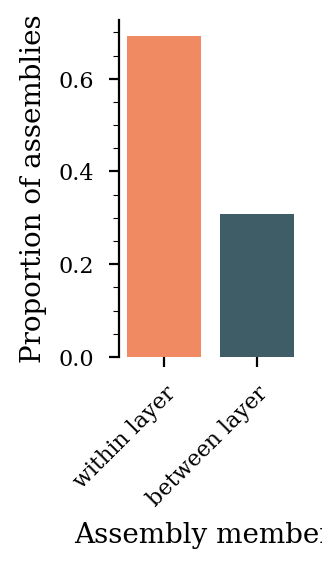

[302, 134]

In [60]:
labels = ["within layer", "between layer"]
counts = [(df_assembly_bias.deep_biased | df_assembly_bias.sup_biased).sum(), (df_assembly_bias.mixed).sum()]

fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

group_colors = {"same_layer": '#ef8a62',
            'cross_layer': '#3e5d66'}

# Horizontal Bar Plot
ax.bar(labels, np.array(counts) / sum(counts), color=group_colors.values())

# Remove axes splines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel("Proportion of assemblies")
ax.set_xlabel("Assembly members")

sns.despine(bottom=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

counts

In [56]:
df_assembly_bias = (
    df.groupby(["basepath", "assembly_n"])
    .apply(
        lambda x: pd.Series(
            {
                "mixed": ((x.deepSuperficial == "Deep") & x.membership).any()
                & ((x.deepSuperficial == "Superficial") & x.membership).any()
                & (x.query("deepSuperficial.str.contains('Deep|Superficial')").shankID.nunique() >1),
                "deep_biased": ((x.deepSuperficial == "Deep") & x.membership).any()
                & (((x.deepSuperficial == "Superficial") & x.membership).any() == False)
                & (x.query("deepSuperficial.str.contains('Deep|Superficial')").shankID.nunique() >1),
                "sup_biased": ((x.deepSuperficial == "Deep") & x.membership).any() == False
                & ((x.deepSuperficial == "Superficial") & x.membership).any()
                & (x.query("deepSuperficial.str.contains('Deep|Superficial')").shankID.nunique() >1),
            }
        )
    )
    .reset_index()
)

df_assembly_bias


,basepath,assembly_n,mixed,deep_biased,sup_biased
0,Z:\Data\AYAold\AB1\day1,0,True,False,False
1,Z:\Data\AYAold\AB1\day1,1,True,False,False
2,Z:\Data\AYAold\AB3\AB3_38_41,2,True,False,False
3,Z:\Data\AYAold\AB3\AB3_38_41,3,True,False,False
4,Z:\Data\AYAold\AB3\AB3_38_41,4,True,False,False
...,...,...,...,...,...
431,Z:\Data\Kenji\km01.055_071,431,False,False,True
432,Z:\Data\Kenji\km01.087_099,432,False,False,True
433,Z:\Data\Kenji\nlx_070329,433,False,True,False
434,Z:\Data\Kenji\nlx_070329,434,False,True,False


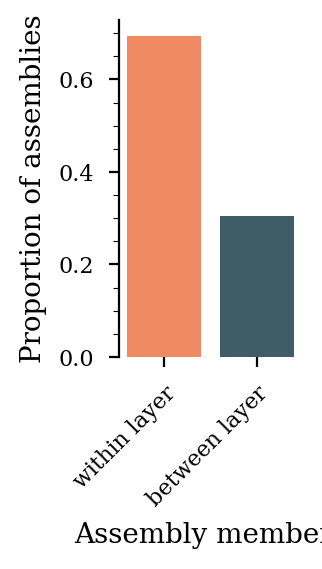

[300, 132]

In [58]:
labels = ["within layer", "between layer"]
counts = [(df_assembly_bias.deep_biased | df_assembly_bias.sup_biased).sum(), (df_assembly_bias.mixed).sum()]

fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

group_colors = {"same_layer": '#ef8a62',
            'cross_layer': '#3e5d66'}

# Horizontal Bar Plot
ax.bar(labels, np.array(counts) / sum(counts), color=group_colors.values())

# Remove axes splines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel("Proportion of assemblies")
ax.set_xlabel("Assembly members")

sns.despine(bottom=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

counts

In [80]:
for assembly_num in df.assembly_n.unique():
    if df.query("assembly_n == @assembly_num").shankID.nunique() == 1:
        print(df.query("assembly_n == @assembly_num").basepath.unique())
        print(df[df.basepath == df.query("assembly_n == @assembly_num").basepath.unique()[0]].shankID.unique())


['Z:\\Data\\AYAold\\AYA4\\day150726']
[1]
['Z:\\Data\\AYAold\\AYA4\\day150726']
[1]
['Z:\\Data\\AYAold\\AYA4\\day150726']
[1]
['Z:\\Data\\AYAold\\AYA4\\day150728']
[1]
['Z:\\Data\\AYAold\\AYA4\\day150728']
[1]
['Z:\\Data\\AYAold\\AYA4\\day150804']
[1]
['Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140708']
[18]


## Pairwise corr of members and non members + deep/sup

In [95]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup_3_3_23'
assembly_corrs_deep_sup.assembly_corr_run(df,save_path,parallel=False)

Z:\Data\AYAold\AB1\day1


In [81]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup'

corr_df = pd.DataFrame()
sessions = glob.glob(save_path +os.sep+ '*.csv')
for session in sessions:
    temp_df = pd.read_csv(session)
    corr_df = pd.concat([corr_df,temp_df],ignore_index=True)
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1
...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329


In [82]:
idx = (
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'non_member_deep_sup')
)
corr_df['membership'] = 'member'
corr_df.loc[idx,'membership']  ='non_member'
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath,membership
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1,member
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1,member
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1,member
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1,member
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1,member
...,...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member


In [83]:
corr_df = functions.add_animal_id(corr_df)


In [84]:
idx = (
    (corr_df.label == 'member_deep') |
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'member_sup') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'member_deep_sup') |
    (corr_df.label == 'non_member_deep_sup')
)
bad_idx = np.isnan(corr_df[idx].rho) | np.isinf(corr_df[idx].rho)

data = corr_df[idx & ~bad_idx]

In [85]:
corr_df['label_2'] = 'unknown'
idx = (corr_df.label == 'member_deep') | (corr_df.label == 'member_sup')
corr_df.loc[idx,'label_2'] = 'member_same_layer'

idx = (corr_df.label == 'member_deep_sup')
corr_df.loc[idx,'label_2'] = 'member_cross_layer'

idx = (corr_df.label == 'non_member_deep') | (corr_df.label == 'non_member_sup') | (corr_df.label == 'non_member_deep_sup') 
corr_df.loc[idx,'label_2'] = 'non_member'

In [88]:
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath,membership,animal_id,label_2
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
...,...,...,...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member


In [94]:
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath,membership,animal_id,label_2
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1,unknown
...,...,...,...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx,non_member


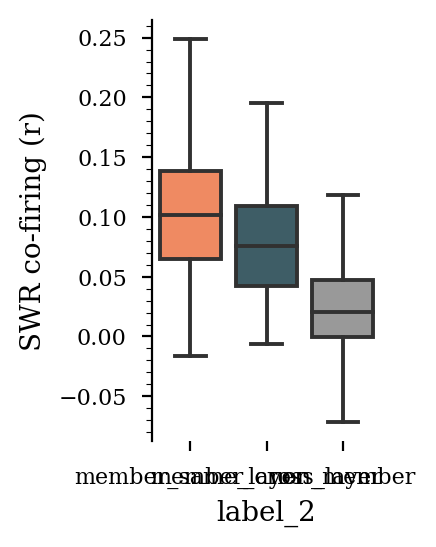

In [93]:
group_colors = {"member_same_layer": '#ef8a62',
            'member_cross_layer': '#3e5d66',
            "non_member": '#999999'}

sns.set_palette(sns.color_palette(group_colors.values()))

w, h = functions.set_size("thesis", fraction=0.25, subplots=(3, 1))
fig = plt.figure(figsize=(w, h), edgecolor=None)

sns.boxplot(
    y="rho", x="label_2", order=group_colors.keys(), data=corr_df, showfliers=False, saturation=1
)
sns.despine(bottom=True)
ax = plt.gca()
ax.set_ylabel('SWR co-firing (r)')

ax.yaxis.set_minor_locator(AutoMinorLocator())